In [1]:
from typing import List 

import random 
import time 



In [2]:
import sys
sys.path.append('/home/benshalom/MEA_Analysis/MaxwellBiosystemsDeviceInterface')

In [3]:
import maxlab as mx

In [4]:
# Initialize the Maxlab device and system 
mx.initialize() # Initialize the chip/WP and loads a deafult configuration 
mx.send(mx.Core().enable_stimulation_power(True)) # activates all Stimulation Units ** only required if stimulation is part of your experiment
# successful execution of the above command will be indicated by a 'OK' message --> meaning system initialization was successful



AttributeError: module 'maxlab' has no attribute 'initialize'

# Preparing the Electrode Selection

In [ ]:
'''Two categories of electrodes: Recording Electrodes (electrodes) and Stimulation Electrodes (stim_electrodes). '''
# Example 
electrodes = [4885, 4886, 4887, 4888, 4889] # list of recording electrodes
stim_electrodes = [4890, 4891, 4892, 4893, 4894] # list of stimulation electrodes
# Maximum number of electrodes is 1020 
# Maximum number of stimulation electrodes is 32

In [ ]:
# existing electrode configurations can be loaded from a file
array = mx.Array("stimulation") 
array.load_config("path/to/example_config.cfg") # loads a configuration file

Highlighted specific unit: 26400
Highlighted Units Inside the Region: [4900, 4901, 4902, 4903, 4904, 4905, 4906, 4907, 4908, 4909, 4910, 4911, 4912, 4913, 4914, 4915, 4916, 4917, 4918, 4919, 4920, 4921, 4922, 4923, 4924, 4925, 4926, 4927, 4928, 4929, 4930, 4931, 4932, 4933, 4934, 4935, 4936, 4937, 4938, 4939, 4940, 4941, 4942, 4943, 4944, 4945, 4946, 4947, 4948, 4949, 4950, 4951, 4952, 4953, 4954, 4955, 4956, 4957, 4958, 4959, 4960, 4961, 4962, 4963, 4964, 4965, 4966, 4967, 4968, 4969, 4970, 4971, 4972, 4973, 4974, 4975, 4976, 4977, 4978, 4979, 4980, 4981, 4982, 4983, 4984, 4985, 4986, 4987, 4988, 4989, 4990, 4991, 4992, 4993, 4994, 4995, 4996, 4997, 4998, 4999, 5000, 5001, 5002, 5003, 5004, 5005, 5006, 5007, 5008, 5009, 5010, 5011, 5012, 5013, 5014, 5015, 5016, 5017, 5018, 5019, 5020, 5021, 5022, 5023, 5024, 5025, 5026, 5027, 5028, 5029, 5030, 5031, 5032, 5033, 5034, 5035, 5036, 5037, 5038, 5039, 5040, 5120, 5121, 5122, 5123, 5124, 5125, 5126, 5127, 5128, 5129, 5130, 5131, 5132, 5133,

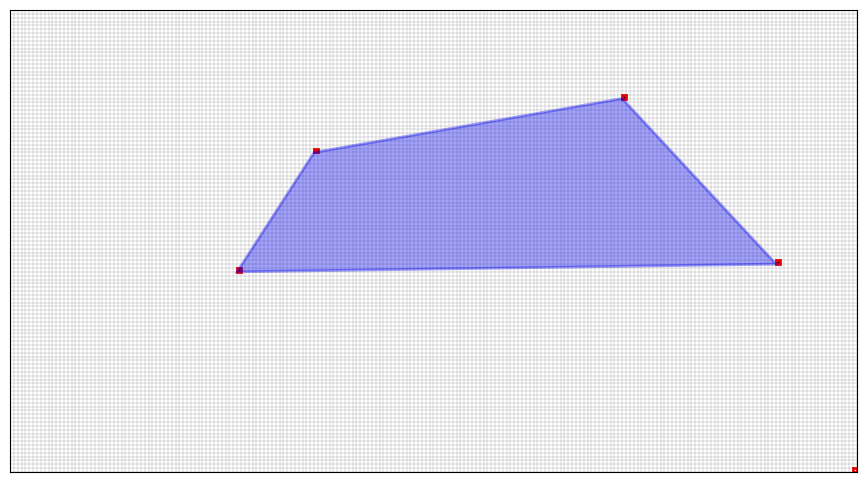

6486


In [43]:
# WITHOUT LINE UNITS 
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon

def create_grid(rows=120, cols=220, highlight_units=None, shape_units=None):
    """
    Create a 120x220 grid, highlight specific units, connect units to form a shape,
    and return all unit numbers inside the highlighted region.

    Args:
        rows (int): Number of rows in the grid.
        cols (int): Number of columns in the grid.
        highlight_units (list): List of unit numbers to highlight (1-indexed).
        shape_units (list): List of unit numbers to connect and form a shape.

    Returns:
        list: List of all unit numbers inside the highlighted region.
    """
    # Create a blank grid
    grid = np.zeros((rows, cols))

    # Highlight specific units
    if highlight_units:
        for unit in highlight_units:
            # Convert 1-indexed unit number to row and column
            row = (unit - 1) // cols
            col = (unit - 1) % cols
            grid[row, col] = 1  # Mark the unit as highlighted

    # Plot the grid
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.imshow(grid, cmap="Greys", extent=[0, cols, 0, rows])

    # Draw borders around highlighted units
    for unit in highlight_units or []:
        row = (unit - 1) // cols
        col = (unit - 1) % cols
        rect = plt.Rectangle((col, rows - row - 1), 1, 1, edgecolor="red", facecolor="none", linewidth=2)
        ax.add_patch(rect)

    # Highlight the specific unit if provided
    if specific_unit:
        row = (specific_unit - 1) // cols
        col = (specific_unit - 1) % cols
        rect = plt.Rectangle((col, rows - row - 1), 1, 1, edgecolor="red", facecolor="none", linewidth=2)
        ax.add_patch(rect)

    # Connect units to form a shape using highlight_units
    if highlight_units and len(highlight_units) == 4:
        # Convert unit numbers to grid coordinates
        coords = [[(unit - 1) // cols, (unit - 1) % cols] for unit in highlight_units]

        # Convert to grid coordinates for plotting
        plot_coords = [(col, rows - row - 1) for row, col in coords]

        # Draw lines connecting the points
        polygon = Polygon(plot_coords, closed=True, edgecolor="blue", facecolor="blue", alpha=0.2, linewidth=2)
        ax.add_patch(polygon)
    if highlight_units and len(highlight_units) == 4:
        # Convert unit numbers to grid coordinates
        coords = [[(unit - 1) // cols, (unit - 1) % cols] for unit in highlight_units]

        # Convert to grid coordinates for plotting
        plot_coords = [(col, rows - row - 1) for row, col in coords]

        # Draw lines connecting the points
        polygon = Polygon(plot_coords, closed=True, edgecolor="blue", facecolor="blue", alpha=0.2, linewidth=2)
        ax.add_patch(polygon)

        # Calculate the bounding box of the highlighted region
        rows_coords, cols_coords = zip(*coords)
        min_row, max_row = min(rows_coords), max(rows_coords)
        min_col, max_col = min(cols_coords), max(cols_coords)

        # Collect all unit numbers inside the bounding box
        highlighted_units = []
        for row in range(min_row, max_row + 1):
            for col in range(min_col, max_col + 1):
                unit_number = row * cols + col + 1  # Convert back to 1-indexed unit number
                highlighted_units.append(unit_number)

        # Print the highlighted units
        print("Highlighted Units Inside the Region:", highlighted_units)

    # Set gridlines
    ax.set_xticks(np.arange(0, cols + 1, 1), minor=True)
    ax.set_yticks(np.arange(0, rows + 1, 1), minor=True)
    ax.grid(which="minor", color="black", linestyle="-", linewidth=0.1)
    ax.tick_params(which="minor", bottom=False, left=False)

    # Remove axis labels
    ax.set_xticks([])
    ax.set_yticks([])

    plt.show()

    # Return the highlighted units
    return highlighted_units 

# Highlight a specific unit/electrode
specific_unit = 26400# Example unit to highlight
highlight_units = [specific_unit]  # Update the highlight_units list to include only the specific unit
print(f"Highlighted specific unit: {specific_unit}")
# Example usage
highlight_units = [5000, 8000, 14800, 14500]  # Units to highlight
shape_units = highlight_units  # Units to connect and form a shape
highlighted_units = create_grid(highlight_units=highlight_units, shape_units=shape_units)
print(len(highlighted_units))



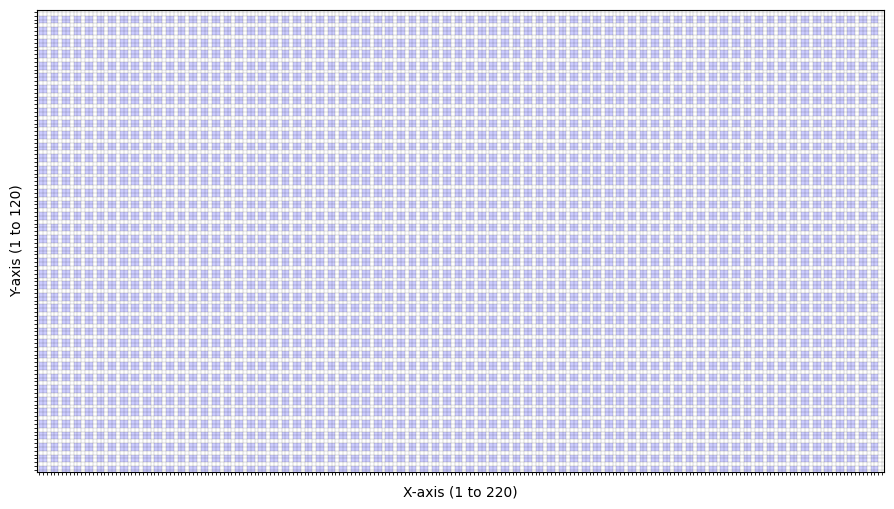

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

def create_grid_with_shaded_blocks(rows=120, cols=220):
    """
    Create a 120x220 grid with shaded blocks of 4 units (2x2) with 1 unit separation.

    Args:
        rows (int): Number of rows in the grid.
        cols (int): Number of columns in the grid.

    Returns:
        None
    """
    # Create a blank grid
    grid = np.zeros((rows, cols))

    # Plot the grid
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.imshow(grid, cmap="Greys", extent=[0.5, cols + 0.5, 0.5, rows + 0.5])

    # Add shaded blocks of 4 units (2x2) with 1 unit separation
    block_size = 2  # 2x2 blocks
    separation = 1  # 1 unit separation
    for row in range(separation, rows - block_size + 1, block_size + separation):
        for col in range(separation, cols - block_size + 1, block_size + separation):
            # Add a shaded rectangle for each block
            rect = Rectangle((col, rows - row - block_size), block_size, block_size, 
                             edgecolor="none", facecolor="blue", alpha=0.2)
            ax.add_patch(rect)

    # Set gridlines
    ax.set_xticks(np.arange(1, cols + 1, 1), minor=True)
    ax.set_yticks(np.arange(1, rows + 1, 1), minor=True)
    ax.grid(which="minor", color="black", linestyle="-", linewidth=0.1)

    # Remove x and y axis ticks
    ax.set_xticks([])
    ax.set_yticks([])

    # Set axis labels
    ax.set_xlabel("X-axis (1 to 220)")
    ax.set_ylabel("Y-axis (1 to 120)")
    ax.set_xlim(0.5, cols + 0.5)
    ax.set_ylim(0.5, rows + 0.5)

    plt.show()

# Example usage
create_grid_with_shaded_blocks()

In [14]:
from matplotlib.patches import Rectangle

def add_shaded_blocks(ax, rows, cols, block_size=2, separation=1, color="blue", alpha=0.2):
    """
    Add shaded blocks of 4 units (2x2) with 1 unit separation to an existing grid.

    Args:
        ax (matplotlib.axes.Axes): The axes to add the shaded blocks to.
        rows (int): Number of rows in the grid.
        cols (int): Number of columns in the grid.
        block_size (int): Size of the blocks (default is 2x2).
        separation (int): Separation between blocks and edges (default is 1 unit).
        color (str): Color of the shaded blocks (default is "blue").
        alpha (float): Transparency of the shaded blocks (default is 0.2).

    Returns:
        None
    """
    for row in range(separation, rows - block_size + 1, block_size + separation):
        for col in range(separation, cols - block_size + 1, block_size + separation):
            # Add a shaded rectangle for each block
            rect = Rectangle((col, rows - row - block_size), block_size, block_size, 
                             edgecolor="none", facecolor=color, alpha=alpha)
            ax.add_patch(rect)

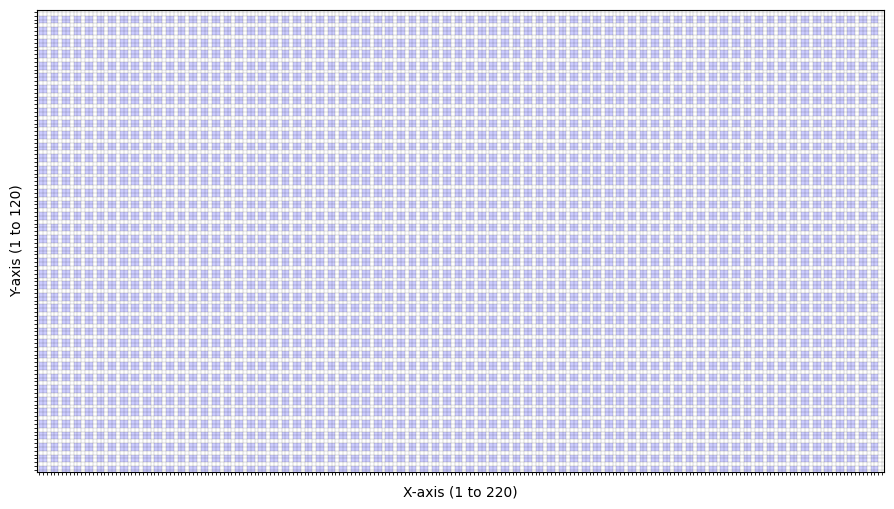

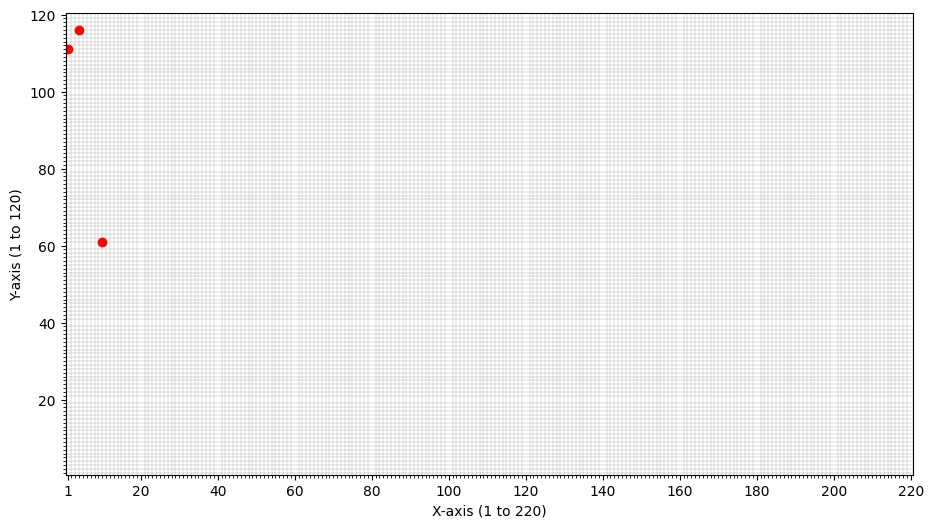

In [16]:
import matplotlib.pyplot as plt
import numpy as np

def create_grid_with_hover(rows=120, cols=220, highlight_coords=None):
    """
    Create a 120x220 grid with hover functionality to display (x, y) coordinates.

    Args:
        rows (int): Number of rows in the grid.
        cols (int): Number of columns in the grid.
        highlight_coords (list): List of (x, y) coordinate pairs to highlight.

    Returns:
        None
    """
    # Create a blank grid
    grid = np.zeros((rows, cols))

# Example usage

    # Convert (x, y) coordinates to grid indices and highlight them
    if highlight_coords:
        for x, y in highlight_coords:
            row = y - 1  # y corresponds to rows (1-indexed to 0-indexed)
            col = x - 1  # x corresponds to columns (1-indexed to 0-indexed)
            grid[row, col] = 1  # Mark the coordinate as highlighted

    # Plot the grid
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.imshow(grid, cmap="Greys", extent=[0.5, cols + 0.5, 0.5, rows + 0.5])

    # Highlight specific coordinates with red dots
    if highlight_coords:
        for x, y in highlight_coords:
            ax.plot(x, rows - y + 1, 'ro')  # Plot red dot at the specified coordinate

    # Set gridlines
    ax.set_xticks(np.arange(1, cols + 1, 1), minor=True)
    ax.set_yticks(np.arange(1, rows + 1, 1), minor=True)
    ax.grid(which="minor", color="black", linestyle="-", linewidth=0.1)

    # Remove x and y axis ticks
    ax.set_xticks([1, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220])
    ax.set_yticks([120, 100, 80, 60, 40, 20, 0])

    # Set axis labels
    ax.set_xlabel("X-axis (1 to 220)")
    ax.set_ylabel("Y-axis (1 to 120)")
    ax.set_xlim(0.5, cols + 0.5)
    ax.set_ylim(0.5, rows + 0.5)

    # Add hover functionality
    def on_hover(event):
        if event.inaxes == ax:
            # Convert mouse position to grid coordinates
            x = int(event.xdata + 0.5)  # Round to nearest integer
            y = int(rows - event.ydata + 0.5)  # Adjust for inverted y-axis
            if 1 <= x <= cols and 1 <= y <= rows:
                ax.set_title(f"Hovering over: (x={x}, y={y})")
                fig.canvas.draw_idle()

    fig.canvas.mpl_connect("motion_notify_event", on_hover)

    plt.show()

# Example usage
# Input coordinate pairs (x, y) to highlight
highlight_coords = [(4, 5), (1, 10), (10, 60)]  # Example coordinates
create_grid_with_shaded_blocks()
create_grid_with_hover(highlight_coords=highlight_coords)


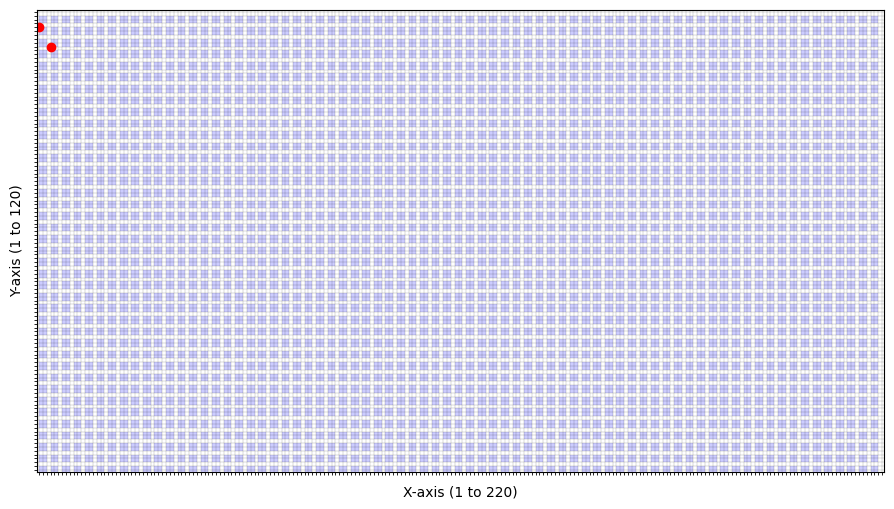

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

def create_grid_with_shaded_blocks(rows=120, cols=220, highlight_coords=None):
    """
    Create a 120x220 grid with shaded blocks and functionality to highlight specific coordinates.

    Args:
        rows (int): Number of rows in the grid.
        cols (int): Number of columns in the grid.
        highlight_coords (list): List of (x, y) coordinate pairs to highlight.

    Returns:
        None
    """
    # Create a blank grid
    grid = np.zeros((rows, cols))

    # Plot the grid
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.imshow(grid, cmap="Greys", extent=[0.5, cols + 0.5, 0.5, rows + 0.5])

    # Add shaded blocks of 4 units (2x2) with 1 unit separation
    block_size = 2  # 2x2 blocks
    separation = 1  # 1 unit separation
    for row in range(separation, rows - block_size + 1, block_size + separation):
        for col in range(separation, cols - block_size + 1, block_size + separation):
            # Add a shaded rectangle for each block
            rect = Rectangle((col, rows - row - block_size), block_size, block_size, 
                             edgecolor="none", facecolor="blue", alpha=0.2)
            ax.add_patch(rect)

    # Highlight specific coordinates with red dots
    if highlight_coords:
        for x, y in highlight_coords:
            ax.plot(x, rows - y + 1, 'ro')  # Plot red dot at the specified coordinate

    # Set gridlines
    ax.set_xticks(np.arange(1, cols + 1, 1), minor=True)
    ax.set_yticks(np.arange(1, rows + 1, 1), minor=True)
    ax.grid(which="minor", color="black", linestyle="-", linewidth=0.1)

    # Remove x and y axis ticks
    ax.set_xticks([])
    ax.set_yticks([])

    # Set axis labels
    ax.set_xlabel("X-axis (1 to 220)")
    ax.set_ylabel("Y-axis (1 to 120)")
    ax.set_xlim(0.5, cols + 0.5)
    ax.set_ylim(0.5, rows + 0.5)

    plt.show()

# Example usage
# Input coordinate pairs (x, y) to highlight
highlight_coords = [(1, 5), (4, 10)]  # Example coordinates
create_grid_with_shaded_blocks(highlight_coords=highlight_coords)

Highlighted Units Inside the Region: [1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1322, 1323, 1324, 1325, 1326, 1327, 1328, 1329, 1330, 1331, 1332, 1333, 1334, 1335, 1336, 1337, 1338, 1339, 1340, 1341, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771, 1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779, 1780, 1781, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2202, 2203, 2204, 2205, 2206, 2207, 2208, 2209, 2210, 2211, 2212, 2213, 2214, 2215, 2216, 2217, 2218, 2219, 2220, 2221, 2422, 2423, 2424, 2425, 2426, 2427, 2428, 2429, 2430, 2431, 2432, 2433, 2434, 2435, 2436, 2437, 2438, 2439, 2440, 2441, 2642, 2643, 2644, 2645, 2646, 2647, 2648, 2649, 2650, 2651, 2652, 2653, 2654, 2655, 2656, 2657, 2658, 2659, 2660, 2661, 28

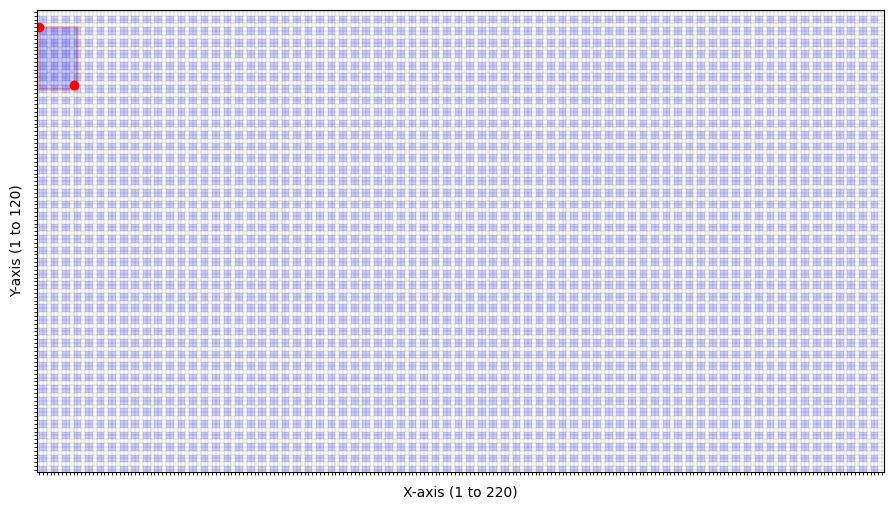

[1102,
 1103,
 1104,
 1105,
 1106,
 1107,
 1108,
 1109,
 1110,
 1111,
 1112,
 1113,
 1114,
 1115,
 1116,
 1117,
 1118,
 1119,
 1120,
 1121,
 1322,
 1323,
 1324,
 1325,
 1326,
 1327,
 1328,
 1329,
 1330,
 1331,
 1332,
 1333,
 1334,
 1335,
 1336,
 1337,
 1338,
 1339,
 1340,
 1341,
 1542,
 1543,
 1544,
 1545,
 1546,
 1547,
 1548,
 1549,
 1550,
 1551,
 1552,
 1553,
 1554,
 1555,
 1556,
 1557,
 1558,
 1559,
 1560,
 1561,
 1762,
 1763,
 1764,
 1765,
 1766,
 1767,
 1768,
 1769,
 1770,
 1771,
 1772,
 1773,
 1774,
 1775,
 1776,
 1777,
 1778,
 1779,
 1780,
 1781,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2202,
 2203,
 2204,
 2205,
 2206,
 2207,
 2208,
 2209,
 2210,
 2211,
 2212,
 2213,
 2214,
 2215,
 2216,
 2217,
 2218,
 2219,
 2220,
 2221,
 2422,
 2423,
 2424,
 2425,
 2426,
 2427,
 2428,
 2429,
 2430,
 2431,
 2432,
 2433,
 2434,
 2435,
 2436,
 2437,
 2438,
 2439,
 2440,
 2441,
 2642,
 2643,
 2644,

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

def create_grid_with_2C(rows=120, cols=220, highlight_coords=None):
    """
    Create a 120x220 grid and shade a rectangle based on two given coordinates.

    Args:
        rows (int): Number of rows in the grid.
        cols (int): Number of columns in the grid.
        highlight_coords (list): List of two (x, y) coordinate pairs to form a rectangle.

    Returns:
        None
    """
    # Create a blank grid
    grid = np.zeros((rows, cols))

    # Plot the grid
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.imshow(grid, cmap="Greys", extent=[0.5, cols + 0.5, 0.5, rows + 0.5])

    # Add shaded blocks of 4 units (2x2) with 1 unit separation
    block_size = 2  # 2x2 blocks
    separation = 1  # 1 unit separation
    for row in range(separation, rows - block_size + 1, block_size + separation):
        for col in range(separation, cols - block_size + 1, block_size + separation):
            # Add a shaded rectangle for each block
            rect = Rectangle((col, rows - row - block_size), block_size, block_size, 
                             edgecolor="none", facecolor="blue", alpha=0.2)
            ax.add_patch(rect)

    # Highlight specific coordinates with red dots
    if highlight_coords:
        for x, y in highlight_coords:
            ax.plot(x, rows - y + 1, 'ro')  # Plot red dot at the specified coordinate

    

    # Shade the rectangle based on two coordinates
    if highlight_coords and len(highlight_coords) == 2:
        (x1, y1), (x2, y2) = highlight_coords

        # Determine the rectangle's edges
        min_x, max_x = min(x1, x2), max(x1, x2)
        min_y, max_y = min(y1, y2), max(y1, y2)

        # Add a shaded rectangle
        rect = Rectangle((min_x, rows - max_y), max_x - min_x + 1, max_y - min_y + 1,
                 edgecolor="red", facecolor="blue", alpha=0.2, linewidth=2)
        ax.add_patch(rect)

        # Collect all unit numbers inside the bounding box
        highlighted_units = []
        for row in range(min_y, max_y + 1):
            for col in range(min_x, max_y + 1):
                unit_number = row * cols + col + 1  # Convert back to 1-indexed unit number
                highlighted_units.append(unit_number)
        if len(highlighted_units) < 1000:
            print("Highlighted Units Inside the Region:", highlighted_units)
            print(f"Highlighted rectangle coordinates: ({min_x}, {min_y}) to ({max_x}, {max_y})")
            print(len(highlighted_units))
        else: 
            print("Too many highlighted units to display. Please select a region with fewer units < 1000.")
    # Set gridlines
    ax.set_xticks(np.arange(1, cols + 1, 1), minor=True)
    ax.set_yticks(np.arange(1, rows + 1, 1), minor=True)
    ax.grid(which="minor", color="black", linestyle="-", linewidth=0.1)
    
    # Remove x and y axis ticks
    ax.set_xticks([])
    ax.set_yticks([])

    # Set axis labels
    ax.set_xlabel("X-axis (1 to 220)")
    ax.set_ylabel("Y-axis (1 to 120)")
    ax.set_xlim(0.5, cols + 0.5)
    ax.set_ylim(0.5, rows + 0.5)

    plt.show()
    return highlighted_units

# Example usage
# Input two coordinates to form a rectangle
highlight_coords = [(1, 5), (10, 20)]  # Example coordinates
create_grid_with_2C(highlight_coords=highlight_coords)

Highlighted Units Inside the Region: [1104, 1105, 1106, 1107, 1108, 1109, 1110, 1111, 1324, 1325, 1326, 1327, 1328, 1329, 1330, 1331, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 2204, 2205, 2206, 2207, 2208, 2209, 2210, 2211, 2424, 2425, 2426, 2427, 2428, 2429, 2430, 2431, 2644, 2645, 2646, 2647, 2648, 2649, 2650, 2651, 2864, 2865, 2866, 2867, 2868, 2869, 2870, 2871, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3304, 3305, 3306, 3307, 3308, 3309, 3310, 3311, 3524, 3525, 3526, 3527, 3528, 3529, 3530, 3531, 3744, 3745, 3746, 3747, 3748, 3749, 3750, 3751, 3964, 3965, 3966, 3967, 3968, 3969, 3970, 3971, 4184, 4185, 4186, 4187, 4188, 4189, 4190, 4191, 4404, 4405, 4406, 4407, 4408, 4409, 4410, 4411]
Highlighted rectangle coordinates: (52.5, 87.5) to (175, 350)
128


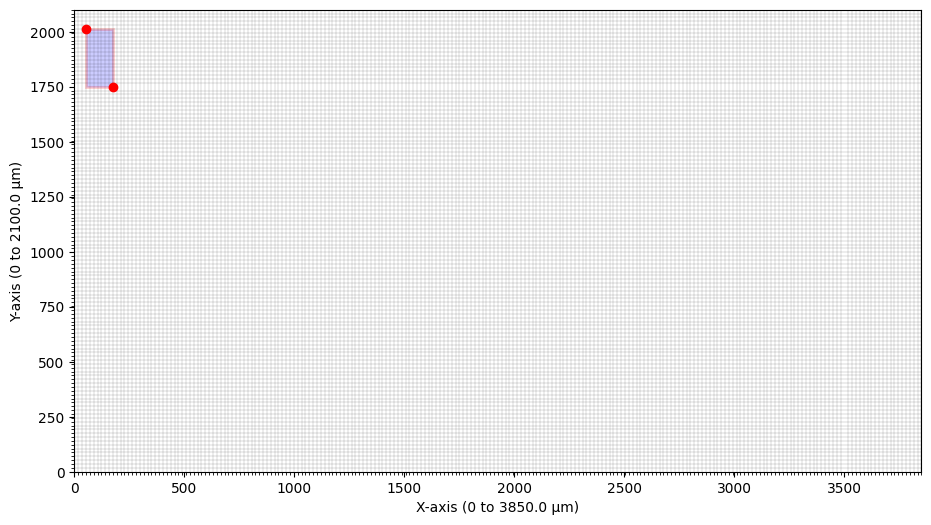

[1104,
 1105,
 1106,
 1107,
 1108,
 1109,
 1110,
 1111,
 1324,
 1325,
 1326,
 1327,
 1328,
 1329,
 1330,
 1331,
 1544,
 1545,
 1546,
 1547,
 1548,
 1549,
 1550,
 1551,
 1764,
 1765,
 1766,
 1767,
 1768,
 1769,
 1770,
 1771,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 2204,
 2205,
 2206,
 2207,
 2208,
 2209,
 2210,
 2211,
 2424,
 2425,
 2426,
 2427,
 2428,
 2429,
 2430,
 2431,
 2644,
 2645,
 2646,
 2647,
 2648,
 2649,
 2650,
 2651,
 2864,
 2865,
 2866,
 2867,
 2868,
 2869,
 2870,
 2871,
 3084,
 3085,
 3086,
 3087,
 3088,
 3089,
 3090,
 3091,
 3304,
 3305,
 3306,
 3307,
 3308,
 3309,
 3310,
 3311,
 3524,
 3525,
 3526,
 3527,
 3528,
 3529,
 3530,
 3531,
 3744,
 3745,
 3746,
 3747,
 3748,
 3749,
 3750,
 3751,
 3964,
 3965,
 3966,
 3967,
 3968,
 3969,
 3970,
 3971,
 4184,
 4185,
 4186,
 4187,
 4188,
 4189,
 4190,
 4191,
 4404,
 4405,
 4406,
 4407,
 4408,
 4409,
 4410,
 4411]

In [55]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

def create_grid_with_2C(rows=120, cols=220, highlight_coords=None, unit_size=17.5):
    """
    Create a 120x220 grid and shade a rectangle based on two given coordinates in micrometers.

    Args:
        rows (int): Number of rows in the grid.
        cols (int): Number of columns in the grid.
        highlight_coords (list): List of two (x, y) coordinate pairs in micrometers to form a rectangle.
        unit_size (float): Size of each unit in micrometers.

    Returns:
        list: List of all unit numbers inside the shaded rectangle.
    """
    # Convert grid dimensions to micrometers
    grid_width = cols * unit_size
    grid_height = rows * unit_size

    # Create a blank grid
    grid = np.zeros((rows, cols))

    # Plot the grid
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.imshow(grid, cmap="Greys", extent=[0, grid_width, 0, grid_height])

    # Add gridlines
    ax.set_xticks(np.arange(0, grid_width + unit_size, unit_size), minor=True)
    ax.set_yticks(np.arange(0, grid_height + unit_size, unit_size), minor=True)
    ax.grid(which="minor", color="black", linestyle="-", linewidth=0.1)

    # Highlight specific coordinates with red dots
    if highlight_coords:
        for x, y in highlight_coords:
            ax.plot(x, grid_height - y, 'ro')  # Plot red dot at the specified coordinate

    # Shade the rectangle based on two coordinates
    if highlight_coords and len(highlight_coords) == 2:
        (x1, y1), (x2, y2) = highlight_coords

        # Determine the rectangle's edges
        min_x, max_x = min(x1, x2), max(x1, x2)
        min_y, max_y = min(y1, y2), max(y1, y2)

        # Add a shaded rectangle
        rect = Rectangle((min_x, grid_height - max_y), max_x - min_x, max_y - min_y,
                         edgecolor="red", facecolor="blue", alpha=0.2, linewidth=2)
        ax.add_patch(rect)

        # Collect all unit numbers inside the bounding box
        highlighted_units = []
        for row in range(int(min_y / unit_size), int(max_y / unit_size) + 1):
            for col in range(int(min_x / unit_size), int(max_x / unit_size) + 1):
                unit_number = row * cols + col + 1  # Convert back to 1-indexed unit number
                highlighted_units.append(unit_number)

        if len(highlighted_units) < 1000:
            print("Highlighted Units Inside the Region:", highlighted_units)
            print(f"Highlighted rectangle coordinates: ({min_x}, {min_y}) to ({max_x}, {max_y})")
            print(len(highlighted_units))
        else:
            print("Too many highlighted units to display. Please select a region with fewer units < 1000.")

    # Set axis labels
    ax.set_xlabel(f"X-axis (0 to {grid_width} µm)")
    ax.set_ylabel(f"Y-axis (0 to {grid_height} µm)")
    ax.set_xlim(0, grid_width)
    ax.set_ylim(0, grid_height)

    plt.show()
    return highlighted_units

# Example usage
# Input two coordinates in micrometers to form a rectangle
highlight_coords = [(52.5, 87.5), (175, 350)]  # Example coordinates in micrometers
create_grid_with_2C(highlight_coords=highlight_coords)

Highlighted Units Inside the Region: [4402, 4403, 4404, 4405, 4406, 4407, 4408, 4409, 4410, 4411, 4412, 4622, 4623, 4624, 4625, 4626, 4627, 4628, 4629, 4630, 4631, 4632, 4842, 4843, 4844, 4845, 4846, 4847, 4848, 4849, 4850, 4851, 4852, 5062, 5063, 5064, 5065, 5066, 5067, 5068, 5069, 5070, 5071, 5072, 5282, 5283, 5284, 5285, 5286, 5287, 5288, 5289, 5290, 5291, 5292, 5502, 5503, 5504, 5505, 5506, 5507, 5508, 5509, 5510, 5511, 5512, 5722, 5723, 5724, 5725, 5726, 5727, 5728, 5729, 5730, 5731, 5732, 5942, 5943, 5944, 5945, 5946, 5947, 5948, 5949, 5950, 5951, 5952, 6162, 6163, 6164, 6165, 6166, 6167, 6168, 6169, 6170, 6171, 6172, 6382, 6383, 6384, 6385, 6386, 6387, 6388, 6389, 6390, 6391, 6392, 6602, 6603, 6604, 6605, 6606, 6607, 6608, 6609, 6610, 6611, 6612, 6822, 6823, 6824, 6825, 6826, 6827, 6828, 6829, 6830, 6831, 6832, 7042, 7043, 7044, 7045, 7046, 7047, 7048, 7049, 7050, 7051, 7052, 7262, 7263, 7264, 7265, 7266, 7267, 7268, 7269, 7270, 7271, 7272, 7482, 7483, 7484, 7485, 7486, 7487, 74

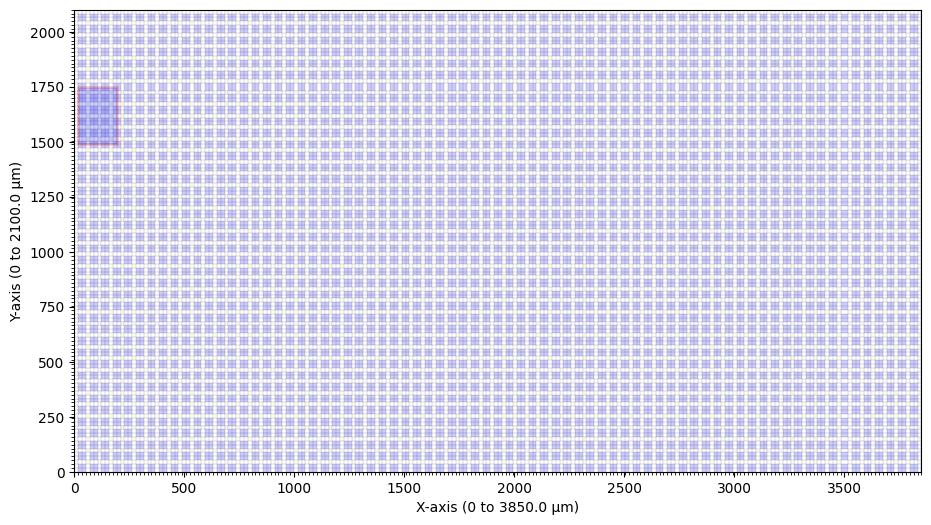

[4402,
 4403,
 4404,
 4405,
 4406,
 4407,
 4408,
 4409,
 4410,
 4411,
 4412,
 4622,
 4623,
 4624,
 4625,
 4626,
 4627,
 4628,
 4629,
 4630,
 4631,
 4632,
 4842,
 4843,
 4844,
 4845,
 4846,
 4847,
 4848,
 4849,
 4850,
 4851,
 4852,
 5062,
 5063,
 5064,
 5065,
 5066,
 5067,
 5068,
 5069,
 5070,
 5071,
 5072,
 5282,
 5283,
 5284,
 5285,
 5286,
 5287,
 5288,
 5289,
 5290,
 5291,
 5292,
 5502,
 5503,
 5504,
 5505,
 5506,
 5507,
 5508,
 5509,
 5510,
 5511,
 5512,
 5722,
 5723,
 5724,
 5725,
 5726,
 5727,
 5728,
 5729,
 5730,
 5731,
 5732,
 5942,
 5943,
 5944,
 5945,
 5946,
 5947,
 5948,
 5949,
 5950,
 5951,
 5952,
 6162,
 6163,
 6164,
 6165,
 6166,
 6167,
 6168,
 6169,
 6170,
 6171,
 6172,
 6382,
 6383,
 6384,
 6385,
 6386,
 6387,
 6388,
 6389,
 6390,
 6391,
 6392,
 6602,
 6603,
 6604,
 6605,
 6606,
 6607,
 6608,
 6609,
 6610,
 6611,
 6612,
 6822,
 6823,
 6824,
 6825,
 6826,
 6827,
 6828,
 6829,
 6830,
 6831,
 6832,
 7042,
 7043,
 7044,
 7045,
 7046,
 7047,
 7048,
 7049,
 7050,
 7051,
 7052,

In [57]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

def create_grid_with_WH(rows=120, cols=220, corner_point=None, width=None, height=None, unit_size=17.5):
    """
    Create a 120x220 grid and shade a rectangle based on a corner point, width, and height in micrometers.

    Args:
        rows (int): Number of rows in the grid.
        cols (int): Number of columns in the grid.
        corner_point (tuple): The (x, y) coordinate of the top-left corner of the rectangle in micrometers.
        width (float): The width of the rectangle in micrometers.
        height (float): The height of the rectangle in micrometers.
        unit_size (float): Size of each unit in micrometers.

    Returns:
        list: List of all unit numbers inside the shaded rectangle.
    """
    # Convert grid dimensions to micrometers
    grid_width = cols * unit_size
    grid_height = rows * unit_size

    # Create a blank grid
    grid = np.zeros((rows, cols))

    # Plot the grid
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.imshow(grid, cmap="Greys", extent=[0, grid_width, 0, grid_height])

    # Add shaded blocks of 4 units (2x2) with 1 unit separation
    block_size = 2 * unit_size  # 2x2 blocks in micrometers
    separation = unit_size  # 1 unit separation in micrometers
    for row in range(1, rows - 1, 3):  # Adjust for block size and separation
        for col in range(1, cols - 1, 3):
            rect = Rectangle((col * unit_size, grid_height - (row + 2) * unit_size), block_size, block_size,
                             edgecolor="none", facecolor="blue", alpha=0.2)
            ax.add_patch(rect)

    # Shade the rectangle based on the corner point, width, and height
    if corner_point and width and height:
        x1, y1 = corner_point

        # Add a shaded rectangle
        rect = Rectangle((x1, grid_height - (y1 + height)), width, height,
                         edgecolor="red", facecolor="blue", alpha=0.2, linewidth=2)
        ax.add_patch(rect)

        # Collect all unit numbers inside the bounding box
        highlighted_units = []
        for row in range(int(y1 / unit_size), int((y1 + height) / unit_size) + 1):
            for col in range(int(x1 / unit_size), int((x1 + width) / unit_size) + 1):
                unit_number = row * cols + col + 1  # Convert to 1-indexed unit number
                highlighted_units.append(unit_number)

        if len(highlighted_units) < 1000:
            print("Highlighted Units Inside the Region:", highlighted_units)
            print(f"Highlighted rectangle coordinates: ({x1}, {y1}) to ({x1 + width}, {y1 + height})")
            print(len(highlighted_units))
        else:
            print("Too many highlighted units to display. Please select a region with fewer units < 1000.")

    # Set gridlines
    ax.set_xticks(np.arange(0, grid_width + unit_size, unit_size), minor=True)
    ax.set_yticks(np.arange(0, grid_height + unit_size, unit_size), minor=True)
    ax.grid(which="minor", color="black", linestyle="-", linewidth=0.1)

    # Set axis labels
    ax.set_xlabel(f"X-axis (0 to {grid_width} µm)")
    ax.set_ylabel(f"Y-axis (0 to {grid_height} µm)")
    ax.set_xlim(0,grid_width)
    ax.set_ylim(0, grid_height)

    plt.show()
    return highlighted_units

# Example usage
# Input the top-left corner point, width, and height in micrometers
corner_point = (17.5, 350)  # Top-left corner (x1, y1) in micrometers
width = 175  # Width of the rectangle in micrometers
height = 262.5  # Height of the rectangle in micrometers
create_grid_with_WH(corner_point=corner_point, width=width, height=height)

Shaded Units Inside the Region + Line Units: [5000, 5215, 5216, 5217, 5218, 5219, 5220, 5221, 5429, 5430, 5431, 5432, 5433, 5434, 5435, 5436, 5437, 5438, 5439, 5440, 5441, 5442, 5643, 5644, 5645, 5646, 5647, 5648, 5649, 5650, 5651, 5652, 5653, 5654, 5655, 5656, 5657, 5658, 5659, 5660, 5661, 5662, 5663, 5858, 5859, 5860, 5861, 5862, 5863, 5864, 5865, 5866, 5867, 5868, 5869, 5870, 5871, 5872, 5873, 5874, 5875, 5876, 5877, 5878, 5879, 5880, 5881, 5882, 5883, 5884, 6072, 6073, 6074, 6075, 6076, 6077, 6078, 6079, 6080, 6081, 6082, 6083, 6084, 6085, 6086, 6087, 6088, 6089, 6090, 6091, 6092, 6093, 6094, 6095, 6096, 6097, 6098, 6099, 6100, 6101, 6102, 6103, 6104, 6105, 6286, 6287, 6288, 6289, 6290, 6291, 6292, 6293, 6294, 6295, 6296, 6297, 6298, 6299, 6300, 6301, 6302, 6303, 6304, 6305, 6306, 6307, 6308, 6309, 6310, 6311, 6312, 6313, 6314, 6315, 6316, 6317, 6318, 6319, 6320, 6321, 6322, 6323, 6324, 6325, 6326, 6500, 6501, 6502, 6503, 6504, 6505, 6506, 6507, 6508, 6509, 6510, 6511, 6512, 6513, 

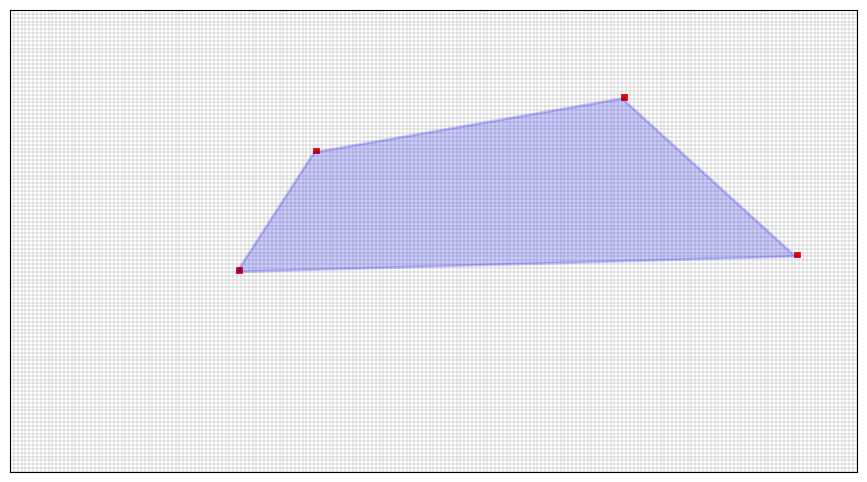

In [ ]:
# WITH LINE UNITS 
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon
from matplotlib.path import Path

def create_grid(rows=120, cols=220, highlight_units=None, shape_units=None):
    """
    Create a 120x220 grid, highlight specific units, connect units to form a shape,
    and return all unit numbers inside the shaded region and along the connecting lines.

    Args:
        rows (int): Number of rows in the grid.
        cols (int): Number of columns in the grid.
        highlight_units (list): List of unit numbers to highlight (1-indexed).
        shape_units (list): List of unit numbers to connect and form a shape.

    Returns:
        dict: A dictionary containing:
            - "shaded_units": List of all unit numbers inside the shaded region.
            - "line_units": List of all unit numbers along the connecting lines.
    """
    # Create a blank grid
    grid = np.zeros((rows, cols))

    # Highlight specific units
    if highlight_units:
        for unit in highlight_units:
            # Convert 1-indexed unit number to row and column
            row = (unit - 1) // cols
            col = (unit - 1) % cols
            grid[row, col] = 1  # Mark the unit as highlighted

    # Plot the grid
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.imshow(grid, cmap="Greys", extent=[0, cols, 0, rows])

    # Draw borders around highlighted units
    for unit in highlight_units or []:
        row = (unit - 1) // cols
        col = (unit - 1) % cols
        rect = plt.Rectangle((col, rows - row - 1), 1, 1, edgecolor="red", facecolor="none", linewidth=2)
        ax.add_patch(rect)

    # Initialize lists for shaded and line units
    shaded_units = []
    line_units = []

    # Connect units to form a shape using highlight_units
    if highlight_units and len(highlight_units) >= 3:
        # Convert unit numbers to grid coordinates
        coords = [[(unit - 1) // cols, (unit - 1) % cols] for unit in highlight_units]

        # Convert to grid coordinates for plotting
        plot_coords = [(col, rows - row - 1) for row, col in coords]

        # Draw lines connecting the points
        polygon = Polygon(plot_coords, closed=True, edgecolor="blue", facecolor="blue", alpha=0.2, linewidth=2)
        ax.add_patch(polygon)

        # Create a Path object for the polygon
        poly_path = Path(plot_coords)

        # Iterate through all grid cells to check if they are inside the polygon
        for row in range(rows):
            for col in range(cols):
                # Convert grid cell to plotting coordinates
                x, y = col, rows - row - 1
                if poly_path.contains_point((x, y)):
                    # Convert back to 1-indexed unit number
                    unit_number = row * cols + col + 1
                    shaded_units.append(unit_number)

        # Calculate units along the lines connecting the points
        for i in range(len(coords)):
            start = coords[i]
            end = coords[(i + 1) % len(coords)]  # Wrap around to the first point
            line_units += get_line_units(start, end, rows, cols)

        # Remove duplicates from line_units
        line_units = list(set(line_units))

        # Print the shaded and line units
        print("Shaded Units Inside the Region + Line Units:", shaded_units + line_units) # provides the shaded units and the line units

    # Set gridlines
    ax.set_xticks(np.arange(0, cols + 1, 1), minor=True)
    ax.set_yticks(np.arange(0, rows + 1, 1), minor=True)
    ax.grid(which="minor", color="black", linestyle="-", linewidth=0.1)
    ax.tick_params(which="minor", bottom=False, left=False)

    # Remove axis labels
    ax.set_xticks([])
    ax.set_yticks([])

    plt.show()

    # Return the shaded and line units
    return {"shaded_units": shaded_units, "line_units": line_units}


def get_line_units(start, end, rows, cols):
    """
    Get all grid units (cells) that a line between two points intersects.

    Args:
        start (list): Starting point [row, col].
        end (list): Ending point [row, col].
        rows (int): Number of rows in the grid.
        cols (int): Number of columns in the grid.

    Returns:
        list: List of unit numbers along the line.
    """
    line_units = []

    # Bresenham's line algorithm for grid traversal
    x1, y1 = start[1], start[0]
    x2, y2 = end[1], end[0]

    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    sx = 1 if x1 < x2 else -1
    sy = 1 if y1 < y2 else -1
    err = dx - dy

    while True:
        # Convert grid coordinates to 1-indexed unit number
        if 0 <= y1 < rows and 0 <= x1 < cols:
            unit_number = y1 * cols + x1 + 1
            line_units.append(unit_number)

        if x1 == x2 and y1 == y2:
            break

        e2 = 2 * err
        if e2 > -dy:
            err -= dy
            x1 += sx
        if e2 < dx:
            err += dx
            y1 += sy

    return line_units


# Example usage
highlight_units = [5000, 8000, 14800, 14065]  # Units to highlight # Make sure to put in correct order [top left point, top right point, bottom right point, bottom left point]
shape_units = highlight_units  # Units to connect and form a shape
result = create_grid(highlight_units=highlight_units, shape_units=shape_units)
